# Import  
파이썬에서 다른 모듈이나 패키지에서 함수, 클래스 등을 가져옵니다.

In [1]:
!pip install koreanize-matplotlib
import koreanize_matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\HOME\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#### 시드(seed) 고정  
매번 고정된 결과를 얻기 위해서 사용합니다.  
시드를 고정하지 않는다면 같은 코드라도 매번 다른 결과가 나올 수 있습니다.

In [5]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

#### 데이터 읽어오기 및 데이터 확인

In [6]:
# pd.read_csv() 함수를 사용해서 데이터를 읽어오는 코드입니다.
train = pd.read_csv('C:/Users/HOME/Downloads/범죄분류데이터/train.csv')

# 데이터를 확인하기 위해 head() 함수를 사용합니다.
train.head()

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


#### 독립변수(x_train), 종속변수(y_train)로 분리하기  


In [7]:
x_train = train.drop(['ID', 'TARGET'], axis = 1)
y_train = train['TARGET']


In [8]:
x_train.head()

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
1,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
2,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도
3,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지
4,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소


#### train , validation data 나누기

In [9]:
X_tr, X_val, Y_tr, Y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

#### 라벨인코딩(Label Encoding) 

In [10]:

ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()
    
    # Fit and transform on the training data
    le = le.fit(X_tr[feature])
    X_tr[feature] = le.transform(X_tr[feature])

    # Transform the test data (Note: Only transform, do not fit again to avoid data leakage)
    X_val[feature] = le.transform(X_val[feature])



### 샘플링

#### 오버샘플링

In [11]:
oversampler = RandomOverSampler( random_state=42)
X_tr_resampled, Y_tr_resampled = oversampler.fit_resample(X_tr, Y_tr)


In [12]:
Y_tr_resampled.value_counts()

TARGET
1    25534
2    25534
0    25534
Name: count, dtype: int64

#### 모델 학습

In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_tr_resampled, Y_tr_resampled)


RandomForestClassifier(random_state=42)

In [18]:
pred = rf_model.predict(X_val)

#### 예측

정확도 : 0.5224
정말도 : 0.5172
Recall: 0.5224
F1 Score: 0.5180
Confusion Matrix:
[[6988 1908 2023]
 [2568 3674 1400]
 [2825 1371 2565]]


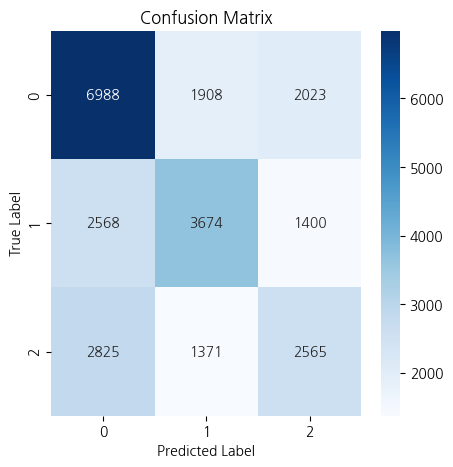

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, pred, average='weighted')  # 다중 클래스인 경우 average 설정
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, pred, average='weighted')  # 다중 클래스인 경우 average 설정
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, pred)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### SMOTE

In [26]:
smote = SMOTE( random_state=42)
X_tr_smote, Y_tr_smote = smote.fit_resample(X_tr, Y_tr)


In [27]:
print(X_tr_smote.shape)
print(Y_tr_smote.shape)

(76602, 18)
(76602,)


In [28]:
Y_tr_smote.value_counts()

TARGET
1    25534
2    25534
0    25534
Name: count, dtype: int64

In [29]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_tr_smote, Y_tr_smote)


RandomForestClassifier(random_state=42)

정확도 : 0.5118
정말도 : 0.5078
Recall: 0.5118
F1 Score: 0.5090
Confusion Matrix:
[[6698 2019 2202]
 [2486 3697 1459]
 [2745 1450 2566]]


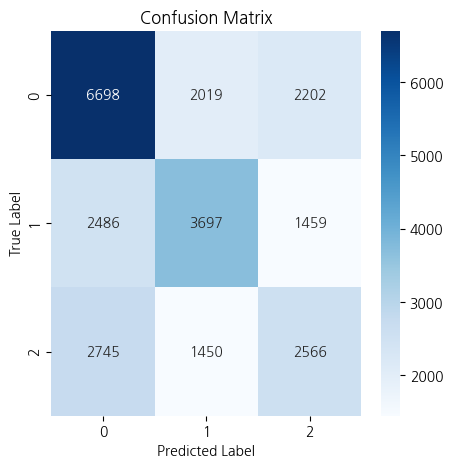

In [30]:
pred = rf_model.predict(X_val)


acc=accuracy_score(Y_val,pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, pred, average='weighted')  # 다중 클래스인 경우 average 설정
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, pred, average='weighted')  # 다중 클래스인 경우 average 설정
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, pred)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# OverSampling 보다 실제 값을 더 많이 찾은 것을 확인
'''
OverSampling 


정확도 : 0.5224
정말도 : 0.5172
Recall: 0.5224
F1 Score: 0.5180

Confusion Matrix:
[[6988 1908 2023]
 [2568 3674 1400]
 [2825 1371 2565]]
 '''

#### 언더샘플링

In [32]:
undersampler = RandomUnderSampler( random_state=42)
X_tr_under, Y_tr_under = undersampler.fit_resample(X_tr, Y_tr)


In [33]:
Y_tr_under.value_counts()

TARGET
0    15795
1    15795
2    15795
Name: count, dtype: int64

In [34]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_tr_under, Y_tr_under)


RandomForestClassifier(random_state=42)

정확도 : 0.5030
정말도 : 0.5109
Recall: 0.5030
F1 Score: 0.5056
Confusion Matrix:
[[5684 2384 2851]
 [1920 3906 1816]
 [2136 1478 3147]]


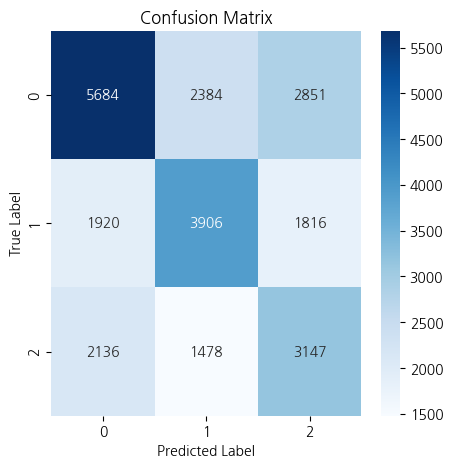

In [35]:
pred = rf_model.predict(X_val)


acc=accuracy_score(Y_val,pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, pred, average='weighted')  # 다중 클래스인 경우 average 설정
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, pred, average='weighted')  # 다중 클래스인 경우 average 설정
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, pred)
print('Confusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# UnderSampling 후에 전체적으로 성능 낮아진 것 확인